In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from collections import Counter

# Upload and load the datasets
from google.colab import files
uploaded = files.upload()

# Load the datasets
tr = pd.read_csv('train.dat')
te = pd.read_csv('test.dat')

# Data preprocessing
tr.columns = ['String']
tr = tr['String'].str.split("\t", n=1, expand=True)
tr.columns = ['Class', 'Peptide']


Saving train.dat to train (5).dat


In [19]:
# Create a dictionary of peptide character counts
dict_val = {}
for i in range(0, len(tr)):
    for j in tr['Peptide'][i]:
        if j not in dict_val:
            dict_val[j] = 1
        else:
            dict_val[j] += 1

print(dict_val)

# Create list of peptide character counts for each peptide
list1 = []
for i in range(0, len(tr)):
    dict1 = {char: 0 for char in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'}
    for j in tr['Peptide'][i]:
        dict1[j] += 1

    arr1 = [int(k) for k in dict1.values()]
    list1.append(np.asarray(arr1))

tr['peptide'] = list1

{'K': 2509, 'A': 3160, 'D': 1880, 'E': 2482, 'L': 3582, 'F': 1505, 'N': 1399, 'G': 2726, 'T': 1905, 'V': 2613, 'H': 896, 'W': 503, 'Y': 1063, 'R': 2322, 'C': 575, 'S': 2312, 'M': 752, 'Q': 1359, 'I': 2337, 'P': 1648, 'X': 4}


In [20]:
# Balance the dataset using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X = list(tr['peptide'])
y = tr['Class'].astype(int)
y = np.where(y < 0, 0, y)

X_resampled, y_resampled = ros.fit_resample(X, y)
print('Original dataset shape', Counter(y))
print('Resampled dataset shape', Counter(y_resampled))

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)

x_train = np.array(x_train).T
y_train = y_train.ravel().reshape(-1, 1)
x_test = np.array(x_test).T
y_test = y_test.ravel().reshape(-1, 1)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

Original dataset shape Counter({0: 1423, 1: 142})
Resampled dataset shape Counter({0: 1423, 1: 1423})
(26, 1992) (26, 854) (1992, 1) (854, 1)


In [21]:
# Define the model
dlModel = Sequential([
    Dense(units=10, activation='relu', input_dim=26),
    Dense(units=10, activation='relu'),
    Dense(units=5, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

dlModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss='binary_crossentropy',
                metrics=['accuracy'])

# Train the model
model = dlModel.fit(x_train.T, y_train, batch_size=10, epochs=8)

# Evaluate the model
score = dlModel.evaluate(x_test.T, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])


Epoch 1/8
200/200 [==============================] - 2s 3ms/step - loss: 0.2706 - accuracy: 0.8976
Epoch 2/8
200/200 [==============================] - 1s 4ms/step - loss: 0.1543 - accuracy: 0.9327
Epoch 3/8
200/200 [==============================] - 0s 2ms/step - loss: 0.1207 - accuracy: 0.9458
Epoch 4/8
200/200 [==============================] - 0s 2ms/step - loss: 0.1010 - accuracy: 0.9508
Epoch 5/8
200/200 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.9538
Epoch 6/8
200/200 [==============================] - 0s 2ms/step - loss: 0.0939 - accuracy: 0.9608
Epoch 7/8
200/200 [==============================] - 0s 2ms/step - loss: 0.0829 - accuracy: 0.9724
Epoch 8/8
27/27 [==============================] - 0s 1ms/step - loss: 0.0872 - accuracy: 0.9766
Test Score: 0.0871850773692131
Test Accuracy: 0.976580798625946


27/27 [==============================] - 0s 2ms/step
Matthews correlation coefficient: 0.953416986181464


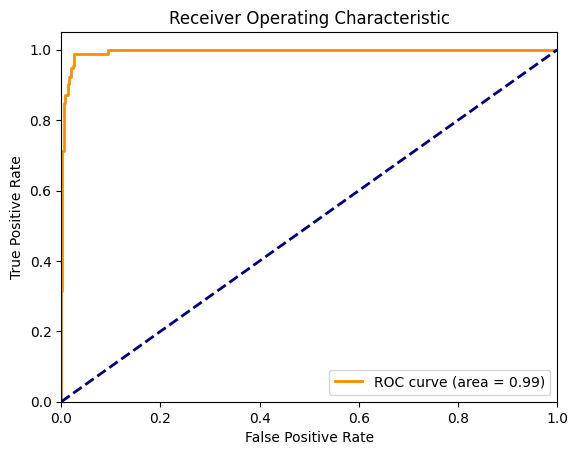

In [22]:
# Predict probabilities for the test set
y_pred_proba = dlModel.predict(x_test.T)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate Matthews correlation coefficient
mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews correlation coefficient:", mcc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

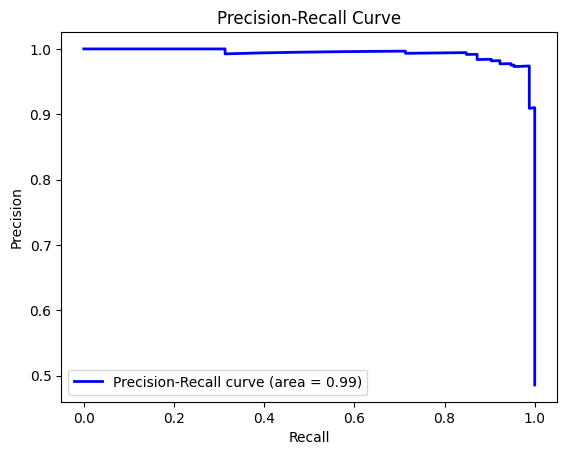

In [23]:
# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % auc(recall, precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()




---



In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

import itertools

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from sklearn.metrics import matthews_corrcoef

tr = pd.read_csv('train.dat')
te = pd.read_csv('test.dat',header=None)
tr.columns = ['String']
tr = tr['String'].str.split("\t",n=1 , expand = True )
tr.columns = ['Class','Peptide']
tr.head()
len(te)

392

In [40]:
# Bag of Words Implementations
dictVals = {}
for i in range(0,len(tr)):
    for j in tr['Peptide'][i]:
        if j not in dictVals:
            dictVals[j] = 1
        else:
            dictVals[j] += 1

print(dictVals)


{'K': 2509, 'A': 3160, 'D': 1880, 'E': 2482, 'L': 3582, 'F': 1505, 'N': 1399, 'G': 2726, 'T': 1905, 'V': 2613, 'H': 896, 'W': 503, 'Y': 1063, 'R': 2322, 'C': 575, 'S': 2312, 'M': 752, 'Q': 1359, 'I': 2337, 'P': 1648, 'X': 4}


In [41]:
import numpy as np

list1 = []

# Define a function to generate the count map
def generate_count_map(peptide):
    count_map = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 0, 'J': 0, 'K': 0,
                 'L': 0, 'M': 0, 'N': 0, 'O': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'U': 0, 'V': 0,
                 'W': 0, 'X': 0, 'Y': 0, 'Z': 0}
    for char in peptide:
        if char != 'X':
            count_map[char] += 1
    return count_map

# Iterate through the peptides in tr
for peptide in tr['Peptide']:
    count_map = generate_count_map(peptide)
    list1.append(np.fromiter(count_map.values(), dtype=int))


tr['Counts'] = list1
tr.head(10)

,Class,Peptide,Counts
0,-1,KADEELFNKLFFGT,"[1, 0, 0, 1, 2, 3, 1, 0, 0, 0, 2, 2, 0, 1, 0, ..."
1,-1,FLVALHLGTAFALLWYFRKRWCALVRGFFASFGGRRNDDAHMM,"[6, 0, 1, 2, 0, 6, 4, 2, 0, 0, 1, 6, 2, 1, 0, ..."
2,-1,RDQMRARIADITGVAISRIA,"[4, 0, 0, 2, 0, 0, 1, 0, 4, 0, 0, 0, 1, 0, 0, ..."
3,-1,RKRLQLLLL,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, ..."
4,-1,PGFCVGEASPLKSPGRRELGHGNLA,"[2, 0, 1, 0, 2, 1, 5, 1, 0, 0, 1, 3, 0, 1, 0, ..."
5,-1,TPEEDTMVMKPLPPEPAP,"[1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, ..."
6,-1,SKDMRVQR,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, ..."
7,-1,IAASIRHPLHCT,"[2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, ..."
8,-1,HPNLNLFAAGHDGGMIVFK,"[2, 0, 0, 1, 0, 2, 3, 2, 1, 0, 1, 2, 1, 2, 0, ..."
9,1,ALWKTLLKKVLKAYSPWTNF,"[2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 4, 0, 1, 0, ..."


In [42]:
# Data isnt balanced (high disparity in -1 and 1 count). Performing sampling to balance it out.
# Initialize RandomOverSampler with a random state\


ros = RandomOverSampler(random_state=42)

# Extract features and target variable

X = tr['Counts'].tolist()  # Convert to list
y = tr['Class'].astype(int).values  # Convert to numpy array
y = np.where(y < 0, 0, y)  # Replace negative values with 0

# Reshape y to ensure compatibility

y = y.reshape(-1, 1)

# Perform random oversampling
X_sampled, y_sampled = ros.fit_resample(X, y)


print(Counter(y_sampled))

len(tr['Counts'][0])

tr.drop(columns = ['Peptide'])



Counter({0: 1423, 1: 1423})


,Class,Counts
0,-1,"[1, 0, 0, 1, 2, 3, 1, 0, 0, 0, 2, 2, 0, 1, 0, ..."
1,-1,"[6, 0, 1, 2, 0, 6, 4, 2, 0, 0, 1, 6, 2, 1, 0, ..."
2,-1,"[4, 0, 0, 2, 0, 0, 1, 0, 4, 0, 0, 0, 1, 0, 0, ..."
3,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, ..."
4,-1,"[2, 0, 1, 0, 2, 1, 5, 1, 0, 0, 1, 3, 0, 1, 0, ..."
...,...,...
1560,-1,"[1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1561,1,"[0, 0, 0, 0, 0, 4, 3, 2, 2, 0, 1, 0, 0, 0, 0, ..."
1562,1,"[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, ..."
1563,-1,"[1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, ..."


Cost after iteration 0 : 0.8688793442109413
Cost after iteration 500 : 0.08610956063617871
Cost after iteration 1000 : 0.07810073387335614
Cost after iteration 1500 : 0.07244974812484166
Cost after iteration 2000 : 0.06681547309064406
Cost after iteration 2500 : 0.06054859372925414
Cost after iteration 3000 : 0.05339201641728909
Cost after iteration 3500 : 0.04594809494795503
Cost after iteration 4000 : 0.03932338774757646
Cost after iteration 4500 : 0.03382083528908141
Cost after iteration 5000 : 0.02938178242202396
Cost after iteration 5500 : 0.025635563274663375
Cost after iteration 6000 : 0.022575662871295643
Cost after iteration 6500 : 0.019965098729153974
Cost after iteration 7000 : 0.017725809592011303
Cost after iteration 7500 : 0.015865034105998457
Cost after iteration 8000 : 0.014308889061752997
Cost after iteration 8500 : 0.012967943926627718
Cost after iteration 9000 : 0.011800980254124306
Cost after iteration 9500 : 0.010783968363931506
Cost after iteration 10000 : 0.00988

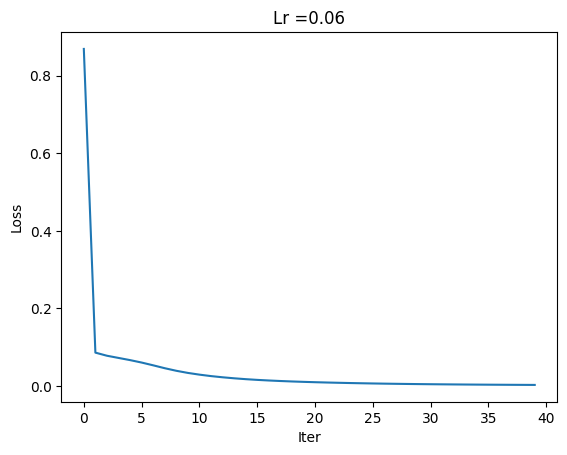

Acc: 1.0
Acc: 0.975206611570248


In [29]:
#Model selection strategy
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def relu(Z):
    return np.maximum(0, Z)

def d_relu(x):
    x[x <= 0] = 0
    x[x > 0] = 1
    return x

def d_sigmoid(Z):
    s = 1 / (1 + np.exp(-Z))
    dZ = s * (1 - s)
    return dZ

class nnModel:
    def __init__(self, x, y):
        self.X = x
        self.Y = y
        self.Yh = np.zeros((1, self.Y.shape[1]))
        self.L = 2
        self.dims = [9, 15, 1]
        self.param = {}
        self.ch = {}
        self.grad = {}
        self.loss = []
        self.lr = 0.003
        self.sam = self.Y.shape[1]
        self.threshold = 0.5

    def initialize_parameters(self):
        np.random.seed(1)
        self.param['W1'] = np.random.randn(self.dims[1], self.dims[0]) / np.sqrt(self.dims[0])
        self.param['b1'] = np.zeros((self.dims[1], 1))
        self.param['W2'] = np.random.randn(self.dims[2], self.dims[1]) / np.sqrt(self.dims[1])
        self.param['b2'] = np.zeros((self.dims[2], 1))
        return

    def forward_propagation(self):
        Z1 = self.param['W1'].dot(self.X) + self.param['b1']
        A1 = relu(Z1)
        self.ch['Z1'], self.ch['A1'] = Z1, A1

        Z2 = self.param['W2'].dot(A1) + self.param['b2']
        A2 = sigmoid(Z2)
        self.ch['Z2'], self.ch['A2'] = Z2, A2

        self.Yh = A2
        loss = self.compute_loss(A2)
        return self.Yh, np.mean(loss)

    def compute_loss(self, Yh):
        loss = (1. / self.sam) * (-np.dot(self.Y, np.log(Yh).T) - np.dot(1 - self.Y, np.log(1 - Yh).T))
        return loss

    def backward_propagation(self):
        dLoss_Yh = - (np.divide(self.Y, self.Yh) - np.divide(1 - self.Y, 1 - self.Yh))

        dLoss_Z2 = dLoss_Yh * d_sigmoid(self.ch['Z2'])
        dLoss_A1 = np.dot(self.param["W2"].T, dLoss_Z2)
        dLoss_W2 = 1. / self.ch['A1'].shape[1] * np.dot(dLoss_Z2, self.ch['A1'].T)
        dLoss_b2 = 1. / self.ch['A1'].shape[1] * np.dot(dLoss_Z2, np.ones([dLoss_Z2.shape[1], 1]))

        dLoss_Z1 = dLoss_A1 * d_relu(self.ch['Z1'])
        dLoss_A0 = np.dot(self.param["W1"].T, dLoss_Z1)
        dLoss_W1 = 1. / self.X.shape[1] * np.dot(dLoss_Z1, self.X.T)
        dLoss_b1 = 1. / self.X.shape[1] * np.dot(dLoss_Z1, np.ones([dLoss_Z1.shape[1], 1]))

        self.param["W1"] = self.param["W1"] - self.lr * dLoss_W1
        self.param["b1"] = self.param["b1"] - self.lr * dLoss_b1
        self.param["W2"] = self.param["W2"] - self.lr * dLoss_W2
        self.param["b2"] = self.param["b2"] - self.lr * dLoss_b2

        return

    def predict(self, x, y):
        self.X = x
        self.Y = y
        comp = np.zeros((1, x.shape[1]))
        pred, loss = self.forward_propagation()

        for i in range(0, pred.shape[1]):
            if pred[0, i] > self.threshold:
                comp[0, i] = 1
            else:
                comp[0, i] = 0

        print("Acc: " + str(np.sum((comp == y) / x.shape[1])))

        return comp

    def gradient_descent(self, X, Y, iterations=3000):
        np.random.seed(1)
        self.initialize_parameters()

        for i in range(0, iterations):
            Yh, loss = self.forward_propagation()
            self.backward_propagation()
            if i % 500 == 0:
                print(f"Cost after iteration {i} : {loss}" )
                self.loss.append(loss)

        plt.plot(np.squeeze(self.loss))
        plt.ylabel('Loss')
        plt.xlabel('Iter')
        plt.title("Lr =" + str(self.lr))
        plt.show()

        return

    def forward_propagation_test(self):
        Z1 = self.param['W1'].dot(self.X) + self.param['b1']
        A1 = relu(Z1)
        self.ch['Z1'], self.ch['A1'] = Z1, A1

        Z2 = self.param['W2'].dot(A1) + self.param['b2']
        A2 = sigmoid(Z2)
        self.ch['Z2'], self.ch['A2'] = Z2, A2

        self.Yh = A2
        return self.Yh

    def predict_test(self, x):
        self.X = x
        comp = np.zeros((1, x.shape[1]))
        pred = self.forward_propagation_test()
        for i in range(0, pred.shape[1]):
            if pred[0, i] > self.threshold:
                comp[0, i] = 1
            else:
                comp[0, i] = 0

        return comp


x_train = list1[0:1200]
x_val = list1[1201:1564]
y_train = tr.iloc[0:1200,0].values
y_val = tr.iloc[1201:1564,0].values

x_train = np.asarray(x_train).T
x_val = np.asarray(x_val).T

y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_train = np.where(y_train<0, 0, y_train)
y_val = np.where(y_val<0, 0, y_val)

y_train = np.reshape(y_train,(1,-1))


nn = nnModel(x_train,y_train)
nn.lr = 0.06
nn.dims = [26, 15, 2]

nn.gradient_descent(x_train, y_train, iterations = 20000)

pred_train = nn.predict(x_train, y_train)
pred_test = nn.predict(x_val, y_val)


Acc: 1.0
mcc: 1.0


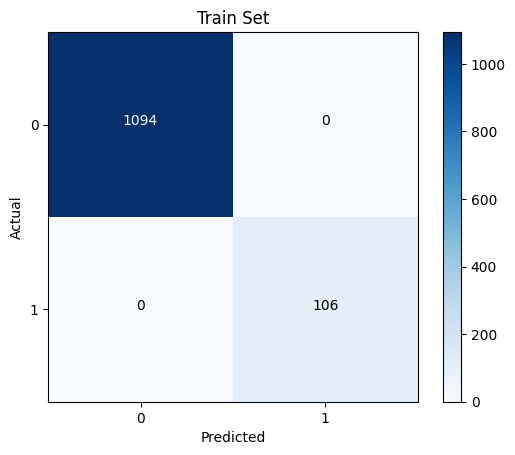

Acc: 0.975206611570248
mcc: 0.8630327554434267


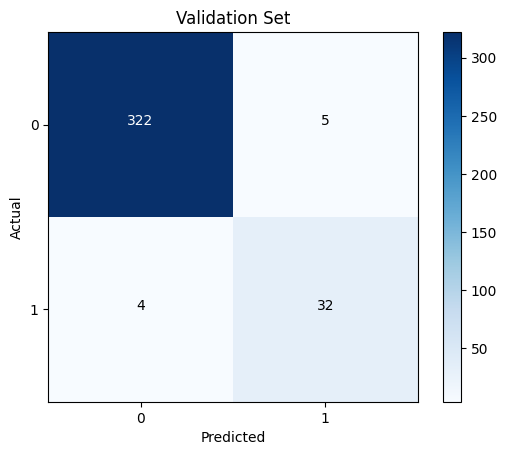

In [44]:
# Evaluating the performance of models
from sklearn.metrics import confusion_matrix
def plotCf(targetX,predictedLabels,t):
    mcc = matthews_corrcoef(targetX, predictedLabels)
    print("mcc:", mcc)
    cf =confusion_matrix(targetX,predictedLabels)
    plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(targetX))) # length of classes
    class_labels = ['0','1']
    plt.xticks(tick_marks,class_labels)
    plt.yticks(tick_marks,class_labels)
    thresh = cf.max() / 2.
    for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
    plt.show();

nn.threshold=0.2

nn.X,nn.Y = x_train, y_train
target=np.around(np.squeeze(y_train), decimals=0).astype(int)
predicted=np.around(np.squeeze(nn.predict(x_train,y_train)), decimals=0).astype(int)
plotCf(target,predicted,'Train Set')

nn.X,nn.Y=x_val, y_val
target=np.around(np.squeeze(y_val), decimals=0).astype(int)
predicted=np.around(np.squeeze(nn.predict(x_val,y_val)), decimals=0).astype(int)
plotCf(target,predicted,'Validation Set')





In [43]:
# Final evaluation on the validation set

nn.X,nn.Y= x_val, y_val
yvalh, loss = nn.forward_propagation()
print("\ny",np.around(y_val[0:100], decimals=0).astype(int))
print("\nyh",np.around(yvalh[0,0:100,], decimals=0).astype(int),"\n")



te.columns = ['Peptide']
te.head()



dict_val = {'A':0,'B':0,'C':0,'D':0,'E':0,'F':0,'G':0,'H':0,'I':0,'J':0,'K':0,'L':0,'M':0,'N':0,'O':0,'P':0,'Q':0,'R':0,'S':0,'T':0,'U':0,'V':0,'W':0,'X':0,'Y':0,'Z':0}
for i in range(0,len(te)):
    for j in te['Peptide'][i]:
        if j not in dict_val:
            dict_val[j] = 1
        else:
            dict_val[j] += 1

print(dict_val)



l3 = []
for i in range(0,len(te)):
    dict2 = {'A':0,'B':0,'C':0,'D':0,'E':0,'F':0,'G':0,'H':0,'I':0,'J':0,'K':0,'L':0,'M':0,'N':0,'O':0,'P':0,'Q':0,'R':0,'S':0,'T':0,'U':0,'V':0,'W':0,'X':0,'Y':0,'Z':0}
    for j in te['Peptide'][i]:
        if j not in dict2:
            dict2[j] = 1
        else:
            dict2[j] += 1
    str1=[]
    for k in dict2.values():

            str1.append(int(k))
    l3.append(np.asarray(str1))


te['Peptide'] = l3
te.head(10)


te.shape


test_vals = te['Peptide']
test_vals = np.array(test_vals).T
test_vals.shape
a=[]
x = pd.DataFrame()
for i in test_vals:

    x= pd.concat([x,pd.DataFrame(i).T])

len(x.values[0])


yh = nn.predict_test(x.values.T)[0]


yh = np.where(yh == 0, -1, yh)
with open('result1.txt','w+') as file:
    for i in yh:
        file.write("%s\n" % int(i))

yh.shape








y [0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

yh [0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0] 

{'A': 695, 'B': 1, 'C': 115, 'D': 481, 'E': 625, 'F': 373, 'G': 672, 'H': 235, 'I': 601, 'J': 0, 'K': 629, 'L': 913, 'M': 192, 'N': 389, 'O': 0, 'P': 409, 'Q': 358, 'R': 713, 'S': 571, 'T': 456, 'U': 0, 'V': 651, 'W': 140, 'X': 0, 'Y': 285, 'Z': 3}


(392,)